In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/develop/examples/module-examples/generators_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

# deeptrack.generators

This example introduces the module deeptrack.generators

# What is a generator

Generators are tools for continuously creating new images from a feature series. They are fully Keras compatible, meaning they can serve as the input to a keras model during training. The first argument is the feature to resolve, while the second is a function that extracts labels from an image, given an image as input.

In [2]:
from deeptrack.generators import Generator

generator = Generator()

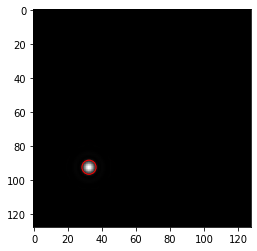

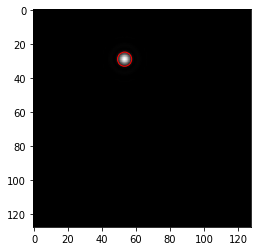

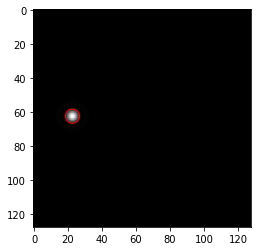

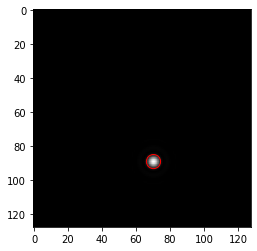

In [3]:
from deeptrack.optics import Fluorescence
from deeptrack.scatterers import PointParticle

import numpy as np
import matplotlib.pyplot as plt

optics = Fluorescence(
    NA=0.7,
    wavelength=680e-9,
    resolution=1e-6,
    magnification=10,
    output_region=(0, 0, 128, 128)
)

scatterer = PointParticle(
    intensity=100,        
    position_unit="pixel",
    position=lambda: np.random.rand(2) * 128
)


imaged_scatterer = optics(scatterer)


def get_particle_position(result):
    for property in result.properties:
        if "position" in property:
            return property["position"]

particle_generator = generator.generate(
    imaged_scatterer, 
    get_particle_position, 
    #shape=(128, 128), 
    batch_size=4
)


# generates next batch
particles, positions = next(particle_generator)

for particle, position in zip(particles, positions):
    plt.imshow(np.squeeze(particle), cmap='gray')
    plt.scatter(position[1], position[0], 200, marker='o', facecolors="none", edgecolors="r")
    plt.show()